In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.signal import argrelmin, argrelmax

In [2]:
datasets_folder = "../datasets/"

In [3]:
dataset_3 = pd.read_csv(datasets_folder + "dataset_3.csv", index_col=0)
dataset_3.head()

,palmBase_x,palmBase_y,palmBase_z,thumb1_x,thumb1_y,thumb1_z,thumb2_x,thumb2_y,thumb2_z,thumb3_x,...,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99
0,80.420688,377.592438,-0.001548,149.374880,356.297949,-4.103198,202.565372,301.797479,-5.569788,241.844779,...,422.0,416.0,415.0,423.0,423.0,417.0,405.0,412.0,411.0,403.0
1,110.621197,362.817404,-0.000964,171.488353,344.784483,-13.536230,213.545279,290.563742,-15.920309,197.287569,...,374.0,381.0,382.0,377.0,374.0,379.0,385.0,378.0,381.0,385.0
2,133.831678,344.170393,-0.000395,189.777625,353.152273,-0.150721,237.681508,317.246519,0.195653,266.015525,...,396.0,400.0,400.0,394.0,393.0,399.0,394.0,390.0,0.0,0.0
3,128.460390,350.709933,-0.001713,181.869894,352.623052,-15.213146,233.693253,320.682299,-24.862064,270.661270,...,369.0,369.0,362.0,359.0,366.0,366.0,359.0,357.0,359.0,366.0
4,101.490308,363.238240,-0.001209,159.770137,359.100482,-4.726096,216.348269,322.170790,-7.722144,263.068047,...,397.0,400.0,393.0,390.0,395.0,399.0,394.0,390.0,391.0,398.0


In [340]:
dataset_2 = pd.read_csv(datasets_folder + "dataset_2.csv", index_col=0)
dataset_2.head()

,palmBase_x,palmBase_y,palmBase_z,thumb1_x,thumb1_y,thumb1_z,thumb2_x,thumb2_y,thumb2_z,thumb3_x,...,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99
0,179.352629,491.420976,-0.000937,247.016957,472.863340,-10.353953,306.868142,425.799720,-15.675461,353.155663,...,440.0,455.0,452.0,441.0,463.0,454.0,442.0,444.0,467.0,446.0
1,197.804898,448.826524,-0.000925,270.499245,416.428820,-7.530851,323.227800,363.003840,-9.875974,360.866853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,193.581542,444.482095,-0.001277,259.900007,421.059798,-6.420943,312.895358,370.463444,-8.778878,351.439277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,194.935523,442.445401,-0.001328,260.309986,418.682091,-6.577441,312.519755,369.992347,-9.111098,350.979281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,193.210453,449.163926,-0.001935,263.743808,420.884357,-8.763059,316.186195,366.459681,-12.435678,347.275965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
dataset_3.columns[:65]

Index(['palmBase_x', 'palmBase_y', 'palmBase_z', 'thumb1_x', 'thumb1_y',
       'thumb1_z', 'thumb2_x', 'thumb2_y', 'thumb2_z', 'thumb3_x', 'thumb3_y',
       'thumb3_z', 'thumb4_x', 'thumb4_y', 'thumb4_z', 'indexFinger1_x',
       'indexFinger1_y', 'indexFinger1_z', 'indexFinger2_x', 'indexFinger2_y',
       'indexFinger2_z', 'indexFinger3_x', 'indexFinger3_y', 'indexFinger3_z',
       'indexFinger4_x', 'indexFinger4_y', 'indexFinger4_z', 'middleFinger1_x',
       'middleFinger1_y', 'middleFinger1_z', 'middleFinger2_x',
       'middleFinger2_y', 'middleFinger2_z', 'middleFinger3_x',
       'middleFinger3_y', 'middleFinger3_z', 'middleFinger4_x',
       'middleFinger4_y', 'middleFinger4_z', 'ringFinger1_x', 'ringFinger1_y',
       'ringFinger1_z', 'ringFinger2_x', 'ringFinger2_y', 'ringFinger2_z',
       'ringFinger3_x', 'ringFinger3_y', 'ringFinger3_z', 'ringFinger4_x',
       'ringFinger4_y', 'ringFinger4_z', 'pinky1_x', 'pinky1_y', 'pinky1_z',
       'pinky2_x', 'pinky2_y', 'pinky2_

In [4]:
dataset_3.describe()

,palmBase_x,palmBase_y,palmBase_z,thumb1_x,thumb1_y,thumb1_z,thumb2_x,thumb2_y,thumb2_z,thumb3_x,...,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000
mean,105.267794,357.668579,-0.001083,168.113927,353.589463,-9.140111,218.511766,313.391584,-11.243295,237.321238,...,359.301887,351.245283,343.377358,342.754717,343.320755,343.660377,336.90566,336.245283,328.735849,313.660377
std,9.623281,11.772287,0.000435,8.465594,4.857181,7.515178,7.393827,8.609134,11.618435,23.814688,...,118.137564,127.682585,136.077357,135.860492,136.135929,136.271638,144.12338,143.858759,150.828246,162.621427
min,80.420688,324.342434,-0.001874,149.374880,340.859610,-21.470606,202.565372,290.563742,-30.675484,197.287569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,100.315229,354.177810,-0.001400,162.546016,351.187221,-15.026034,213.270798,308.014301,-18.811329,213.029785,...,384.000000,382.000000,382.000000,381.000000,379.000000,383.000000,384.00000,378.000000,377.000000,370.000000
50%,104.816245,360.614632,-0.001104,167.227809,354.157348,-10.491909,218.748884,315.668606,-14.071639,243.438143,...,396.000000,393.000000,393.000000,393.000000,395.000000,393.000000,394.00000,393.000000,393.000000,392.000000
75%,110.749784,363.238240,-0.000926,173.932196,356.491361,-5.058350,222.380392,319.253614,-6.770664,257.251286,...,401.000000,402.000000,403.000000,403.000000,402.000000,402.000000,402.00000,403.000000,400.000000,399.000000
max,133.831678,394.656430,-0.000077,189.777625,364.072266,18.695902,237.681508,330.102315,37.532558,271.963943,...,448.000000,451.000000,445.000000,442.000000,445.000000,449.000000,448.00000,439.000000,445.000000,443.000000


In [5]:
anotations_short = {
            -1: "palmBase",
            0: "thumb",
            1: "indexFinger",
            2: "middleFinger",
            3: "ringFinger",
            4: "pinky"
        }


In [19]:
palmBase_x = dataset_3.palmBase_x.tolist()
palmBase_y = dataset_3.palmBase_y.tolist()
thumb_x = dataset_3.thumb4_x.tolist()
thumb_y = dataset_3.thumb4_y.tolist()
indexFinger_x = dataset_3.indexFinger4_x.tolist()
indexFinger_y = dataset_3.indexFinger4_y.tolist()
middleFinger_x = dataset_3.middleFinger4_x.tolist()
middleFinger_y = dataset_3.middleFinger4_y.tolist()
ringFinger_x = dataset_3.ringFinger4_x.tolist()
ringFinger_y = dataset_3.ringFinger4_y.tolist()
pinky_x = dataset_3.pinky4_x.tolist()
pinky_y = dataset_3.pinky4_y.tolist()


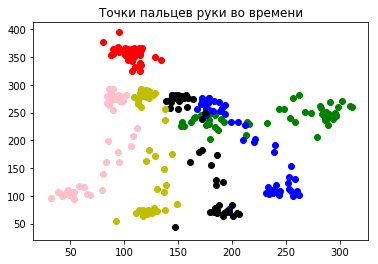

In [118]:
plt.scatter(palmBase_x, palmBase_y, c="r")
plt.scatter(thumb_x, thumb_y, c="g")
plt.scatter(indexFinger_x, indexFinger_y, c="blue")
plt.scatter(middleFinger_x, middleFinger_y, c="black")
plt.scatter(ringFinger_x, ringFinger_y, c="y")
plt.scatter(pinky_x, pinky_y, c="pink")

# plt.savefig("Base_finger_end.jpg")
plt.title("Точки пальцев руки во времени")
plt.show()

In [139]:
# euclidean([palmBase_x[0], palmBase_y[0]], [indexFinger_x[0], indexFinger_y[0]])
bending_dist_base_indexFinger = []
bending_dist_base_thumb = []
bending_dist_base_middleFinger = []
bending_dist_base_ringFinger = []
bending_dist_base_pinky = []

for i in range(len(palmBase_x)):
    bending_dist_base_indexFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [indexFinger_x[i], indexFinger_y[i]]))
    bending_dist_base_thumb.append(euclidean([palmBase_x[i], palmBase_y[i]], [thumb_x[i], thumb_y[i]]))
    bending_dist_base_middleFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [middleFinger_x[i], middleFinger_y[i]]))
    bending_dist_base_ringFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [ringFinger_x[i], ringFinger_y[i]]))
    bending_dist_base_pinky.append(euclidean([palmBase_x[i], palmBase_y[i]], [pinky_x[i], pinky_y[i]]))
    
    

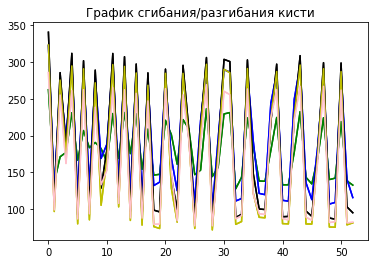

In [349]:
plt.plot(bending_dist_base_thumb, c="g")
plt.plot(bending_dist_base_indexFinger, c="blue")
plt.plot(bending_dist_base_middleFinger, c="black")
plt.plot(bending_dist_base_ringFinger, c="y")
plt.plot(bending_dist_base_pinky, c="pink")
plt.title("График сгибания/разгибания кисти")
plt.show()
# plt.savefig("Bending_grah.jpg")

In [129]:
signals = []
def collect_signals(data_frame, amount=100,  prefix="e"):
    result = data_frame.loc[:,'e0':'e'+str(amount-1)]
    return result.to_numpy()

In [346]:
signals = collect_signals(dataset_3, amount=70)


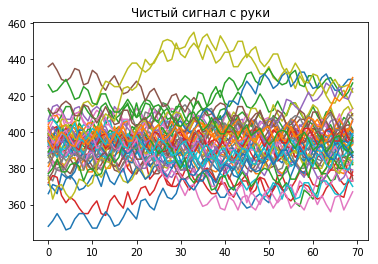

In [347]:
for i, s in enumerate(signals):
    plt.plot(s)
plt.title("Чистый сигнал с руки")
plt.show()

In [156]:
def get_log_signals(data):
    result = []
    for res in data:
        tmp = []
        for r in res:
            tmp.append(np.log(r))
        result.append(tmp)
    return result

In [157]:
signals_log = get_log_signals(signals)

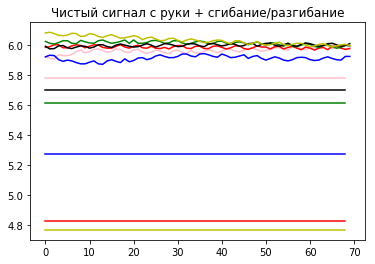

In [172]:
colors = ['r', 'g', "b", "black", "y", "pink"]
for i, s in enumerate(signals_log[20:26]):
    plt.plot(s, c=colors[(i % len(colors)) -1])
    plt.plot([np.log(bending_dist_base_indexFinger[i]) for _ in range(len(s)-1)], c=colors[(i % len(colors)) -1] )
plt.title("Чистый сигнал с руки + сгибание/разгибание")
plt.show()

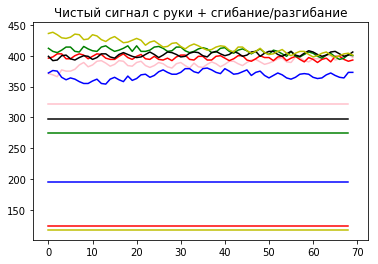

In [173]:
colors = ['r', 'g', "b", "black", "y", "pink"]
for i, s in enumerate(signals[20:26]):
    plt.plot(s, c=colors[(i % len(colors)) -1])
    plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(s)-1)], c=colors[(i % len(colors)) -1] )
plt.title("Чистый сигнал с руки + сгибание/разгибание")
plt.show()

In [320]:
def is_bend(data_bend, threshold=200, bias=25):
    result = []
    for d in data_bend:
#         result.append(d > threshold)
        if d > (threshold + bias):
            result.append(-1)
        elif d < (threshold - bias):
            result.append(1)
        else:
            result.append(0)
    return result

In [321]:
is_bend_base_indexFinger = is_bend(bending_dist_base_indexFinger, bias=50)

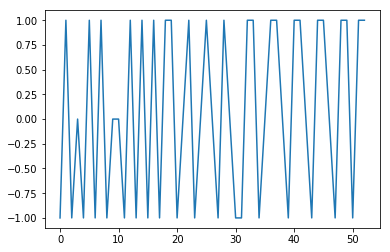

In [322]:
plt.plot(is_bend_base_indexFinger)
plt.show()

In [198]:
# for i in range(len(is_bend_base_indexFinger)):
#     diff_start_end = signals[i][-1] - signals[i][0]
#     diff_max_min = max(signals[i]) - min(signals[i])
#     print("{:2d}".format(is_bend_base_indexFinger[i]),
#           "{:3.0f}".format(diff_start_end), 
#           "{:3.0f}".format(diff_max_min),
#           "{:3.0f}".format(np.average(signals[i])))

In [303]:
def auto_norm(data, threshold=30):
        res_min = np.array(data)
        res_max = np.array(data)
        # удивительно, но медиана уровня дом дереа работает и очень даже неплохо
#         threshold = int(np.median(res))
#         print(threshold)
        cnt = len(res)
        indexes = [i for i in range(len(data))]
        indexes_max = np.array(indexes)
        indexes_min = np.array(indexes)
        def f(res_min, res_max, indexes_min, indexes_max):
            while len(indexes_min) > threshold:
                minInd = argrelmin(res_min)
                res_min = res_min[minInd]
                indexes_min = indexes_min[minInd]
            while len(indexes_max) > threshold:
                maxInd = argrelmax(res_max)
                res_max = res_max[maxInd]
                indexes_max = indexes_max[maxInd]
            return res_min, res_max, indexes_min, indexes_max
        res_min, res_max, indexes_min, indexes_max = f(res_min, res_max, indexes_min, indexes_max)
        return res_min, res_max, indexes_min, indexes_max

In [304]:
res_signal_min_0, res_signal_max_0, _, _ = auto_norm(signals[0])
res_signal_min_1, res_signal_max_1, _, _ = auto_norm(signals[1])

In [305]:
len(res_signal_min)

16

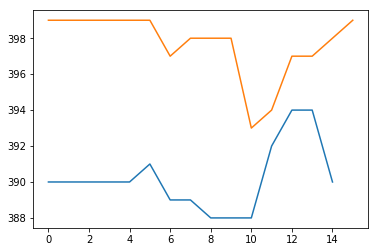

In [335]:
plt.plot(res_signal_min_0)
plt.plot(res_signal_max_0)
plt.show()

# Чем меньше расстояние – тем сильнее сгиб

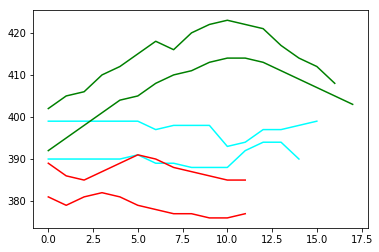

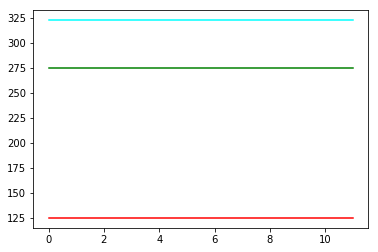

In [337]:
colors = ['r', 'g', "b", "black", "y", "cyan"]
for i, s in enumerate(signals[0:3]):
    res_min, res_max, _, _ = auto_norm(s, 20)
    plt.plot(res_min, c=colors[(i % len(colors)) -1] )
    plt.plot(res_max, c=colors[(i % len(colors)) -1] )
#     plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
plt.show()

for i, s in enumerate([i for i in range(0, 3)]):
    plt.plot([bending_dist_base_indexFinger[s] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
plt.show()

0 3


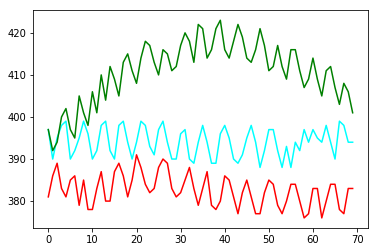

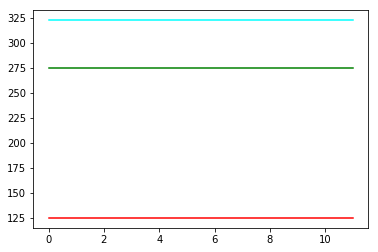

3 6


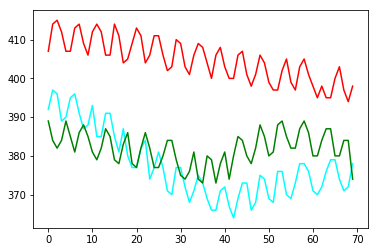

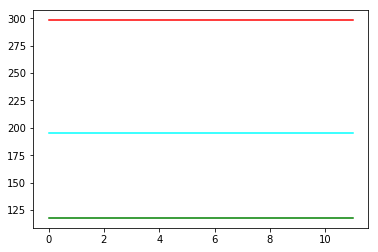

6 9


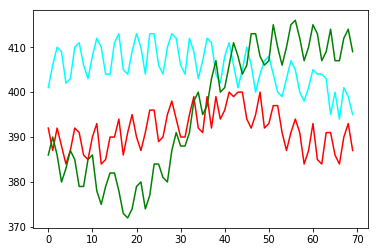

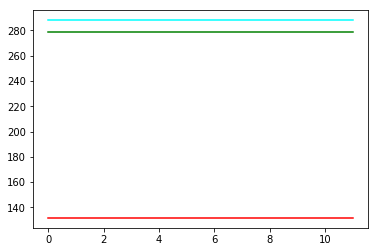

9 12


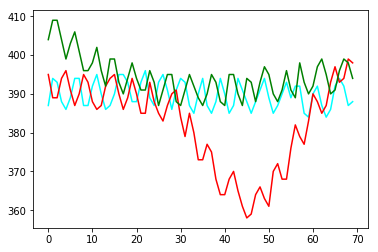

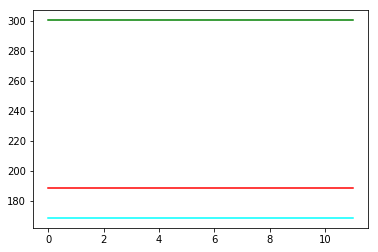

12 15


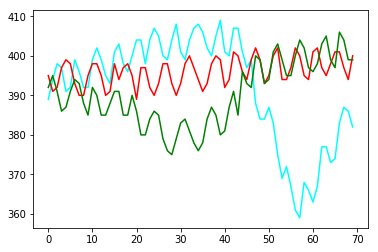

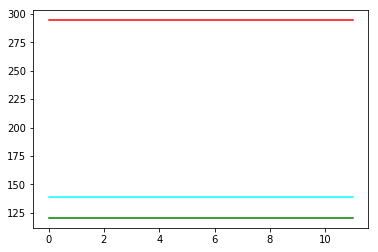

15 18


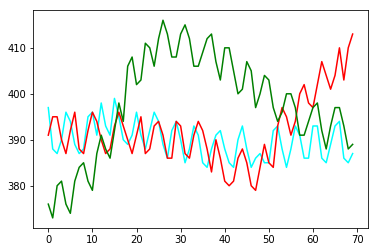

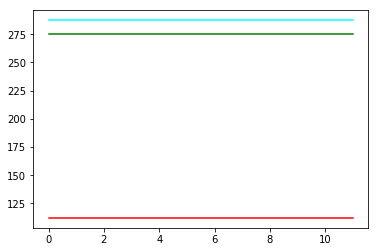

18 21


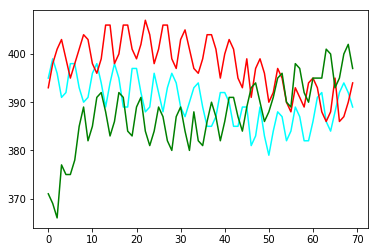

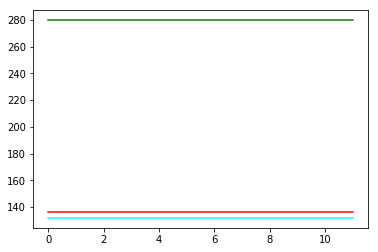

21 24


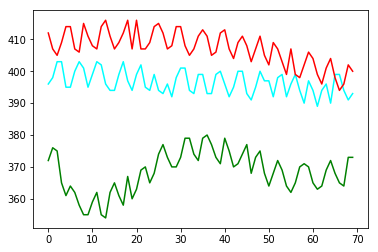

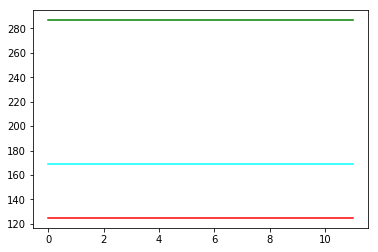

24 27


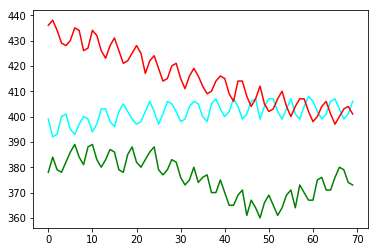

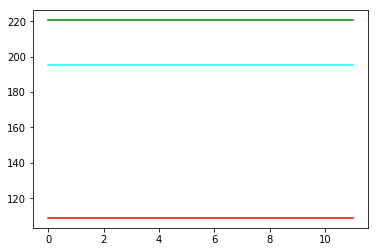

27 30


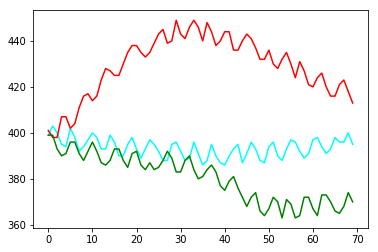

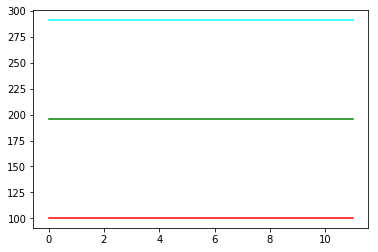

30 33


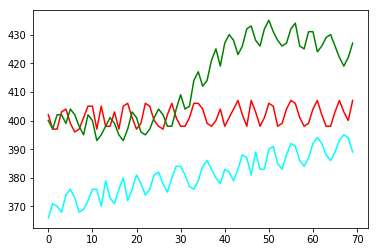

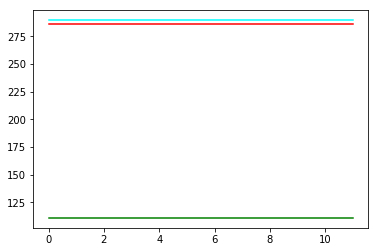

33 36


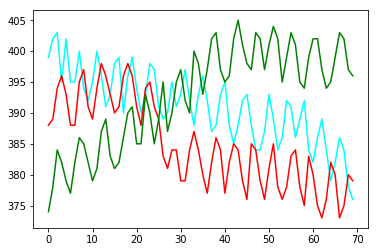

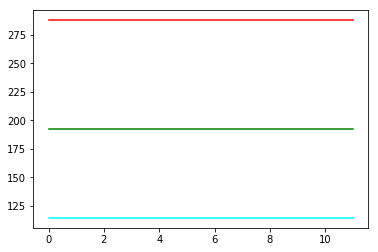

36 39


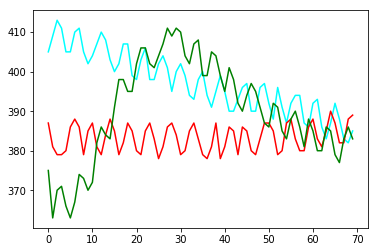

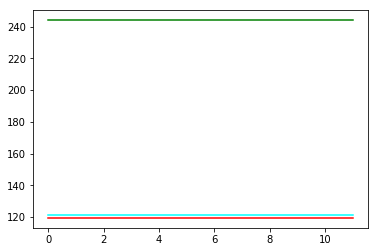

39 42


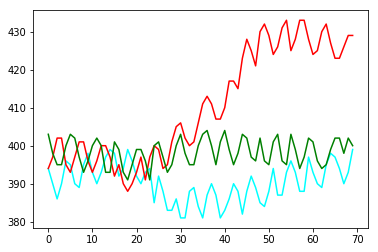

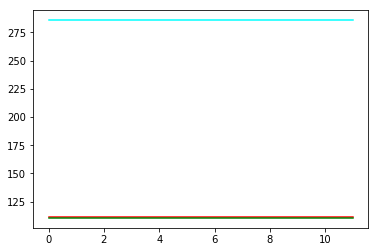

42 45


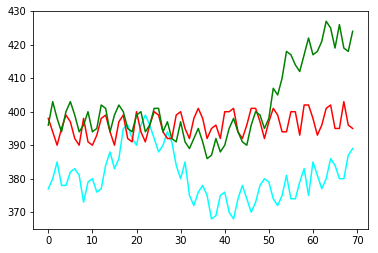

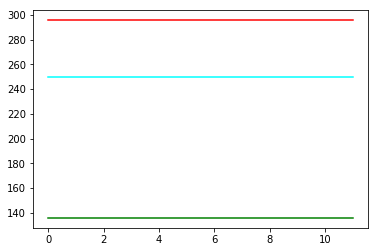

45 48


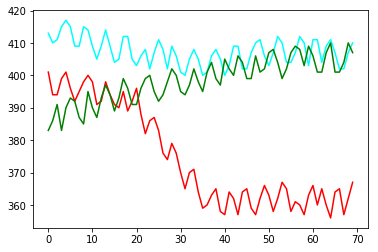

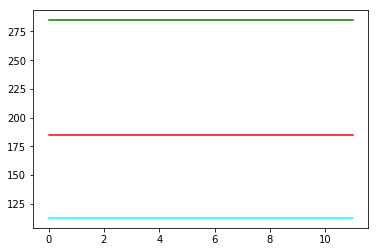

48 51


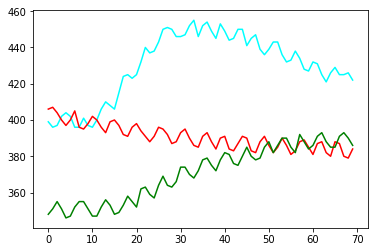

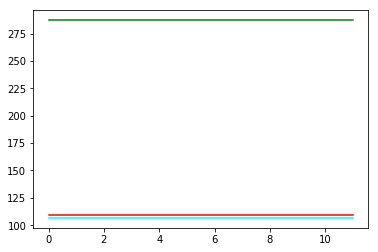

In [339]:
colors = ['r', 'g', "b", "black", "y", "cyan"]
step_size= 3
for step in range(0, len(signals) -step_size, step_size):
    print(step, step+step_size)
    for i, s in enumerate(signals[step:(step+step_size)]):
        res_min, res_max, _, _ = auto_norm(s, 70)
        plt.plot(res_min, c=colors[(i % len(colors)) -1] )
#         plt.plot(res_max, c=colors[(i % len(colors)) -1] )
    #     plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
    plt.show()

    for i, s in enumerate([i for i in range(step, step+step_size)]):
        plt.plot([bending_dist_base_indexFinger[s] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
    plt.show()